<a href="https://colab.research.google.com/github/iiriri13/AI_SpectrumStar/blob/main/SpectrumStar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KDD** process

Importing libraries

In [ ]:
import pandas as pd # MANGING the dataset
import numpy as np

Import kaggle dataset

In [7]:
!mkdir -p /root/.config/kaggle
!cp /kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json

In [8]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Authentication successful!")

Authentication successful!


In [10]:
api.dataset_download_files('cihan063/autism-image-data', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/cihan063/autism-image-data


In [11]:
!ls ./data

AutismDataset


In [12]:
!pip install Pillow

Import images from dataset

In [13]:
import os
from PIL import Image

# مسار مجلد valid
valid_folder = './data/AutismDataset/valid'

# إعداد قائمة لتخزين جميع الصور
all_images = []

# تحميل جميع الصور من المجلدين الفرعيين داخل valid
for sub_folder in os.listdir(valid_folder):
    sub_folder_path = os.path.join(valid_folder, sub_folder)
    if os.path.isdir(sub_folder_path):  # التأكد أنه مجلد وليس ملف
        images = [os.path.join(sub_folder_path, img) for img in os.listdir(sub_folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
        all_images.extend(images)

# طباعة عدد الصور المحملة
print(f"{len(all_images)} has been downloaded")

# عرض أول صورة كاختبار
for img_path in all_images:
    img = Image.open(img_path)
    img.show()

100 has been downloaded


First try

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات
datagen = ImageDataGenerator(rescale=1.0/255)

# تحميل البيانات المصنفة من مجلد valid
data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),  # تغيير حجم الصور إلى 128x128
    batch_size=32,
    class_mode='binary'  # لأن لدينا فئتين فقط: Autistic و Non_Autistic
)

# إنشاء نموذج بسيط
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # مخرجات النموذج: فئة واحدة مع sigmoid
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(data, epochs=10)


Found 100 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5151 - loss: 1.8675
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - accuracy: 0.3997 - loss: 0.9695
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 694ms/step - accuracy: 0.5129 - loss: 0.6850
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 813ms/step - accuracy: 0.6465 - loss: 0.6659
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step - accuracy: 0.7540 - loss: 0.6069
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - accuracy: 0.7014 - loss: 0.5537
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step - accuracy: 0.8084 - loss: 0.4043
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 574ms/step - accuracy: 0.7279 - loss: 0.5835
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 558ms/step - accuracy: 0.8281 - loss: 0.3689
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 550ms/step - accuracy: 0.8812 - loss: 0.2877


Second Try

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات مع Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # تخصيص 20% من البيانات للتحقق
)

# تحميل بيانات التدريب والتحقق
train_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# إنشاء نموذج بسيط مع Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')  # المخرجات: فئة واحدة مع sigmoid
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج مع بيانات التحقق
history = model.fit(train_data, epochs=20, validation_data=validation_data)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5500 - loss: 4.6986 - val_accuracy: 0.5000 - val_loss: 2.1959
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 760ms/step - accuracy: 0.3917 - loss: 2.7364 - val_accuracy: 0.5000 - val_loss: 0.8849
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 726ms/step - accuracy: 0.5148 - loss: 1.5087 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4521 - loss: 0.9454 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 716ms/step - accuracy: 0.5531 - loss: 0.6979 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 722ms/step - accuracy: 0.5492 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4664 - loss: 0.6956 - val_accuracy: 0.5500 - val_loss: 0.6930
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 928ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.5500 - val_loss: 0.6932
Epoch 9/20
3

Third Try

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات مع Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # تخصيص 20% من البيانات للتحقق
)

# تحميل بيانات التدريب والتحقق
train_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# استخدام MobileNetV2 كقاعدة
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # تجميد الطبقات الأساسية

# إنشاء النموذج
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # مخرجات النموذج: فئة واحدة مع sigmoid
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج مع بيانات التحقق
history = model.fit(train_data, epochs=20, validation_data=validation_data)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6010 - loss: 0.7802 - val_accuracy: 0.5000 - val_loss: 0.6874
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 715ms/step - accuracy: 0.6359 - loss: 0.6652 - val_accuracy: 0.7000 - val_loss: 0.5906
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.7070 - loss: 0.5537 - val_accuracy: 0.5500 - val_loss: 0.6988
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.7000 - loss: 0.6129 - val_accuracy: 0.6500 - val_loss: 0.6381
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - accuracy: 0.7219 - loss: 0.5745 - val_accuracy: 0.7000 - val_loss: 0.5539
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 0.7823 - loss: 0.4940 - val_accuracy: 0.6000 - val_loss: 0.7005
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - accuracy: 0.7320 - loss: 0.5043 - val_accuracy: 0.8000 - val_loss:

انتهاء التدريب

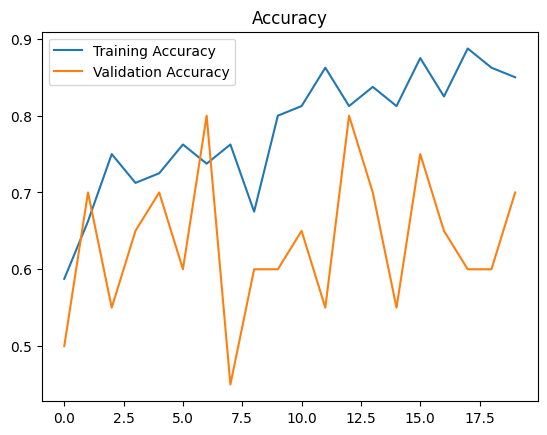

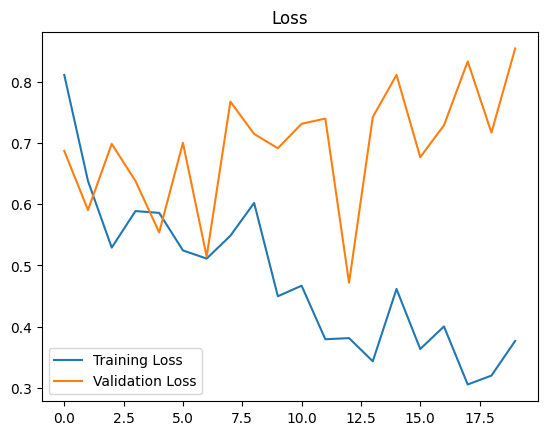

In [17]:
import matplotlib.pyplot as plt

# رسم الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


testing

In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# مسار مجلد valid
valid_folder = './data/AutismDataset/valid'

# متغيرات لحساب الدقة
correct_predictions = 0
total_images = 0

# التحقق من جميع الصور في مجلد valid
for sub_folder in os.listdir(valid_folder):
    sub_folder_path = os.path.join(valid_folder, sub_folder)
    if os.path.isdir(sub_folder_path):
        for img_name in os.listdir(sub_folder_path):
            img_path = os.path.join(sub_folder_path, img_name)
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array)
            predicted_class = "Non-Autistic" if prediction[0][0] > 0.5 else "Autistic"
            true_class = "Non-Autistic" if "Non_Autistic" in sub_folder else "Autistic"

            if predicted_class == true_class:
                correct_predictions += 1
            total_images += 1
            print(f"Image: {img_name}, Predicted: {predicted_class}, True: {true_class}")

# حساب الدقة النهائية
accuracy = (correct_predictions / total_images) * 100
print(f"\nFinal Accuracy: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: 47.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: 08.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: 32.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: 17.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image: 12.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Image: 37.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: 25.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 43.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 02.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: 20.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 30.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━

Save the model

In [21]:
model.save('autism_classifier_model.h5')